In [220]:
!pip install pandas scikit-learn matplotlib seaborn numpy xgboost

link al kaggle: https://www.kaggle.com/code/thomaskonstantin/bank-churn-data-exploration-and-churn-prediction/input?select=BankChurners.csv

In [221]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV


In [222]:
#imports
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

#carga de datos
data = pd.read_csv('../data/telco_custumer_churn.csv')
df = data.copy()
df.drop(columns=['customerID'], inplace=True)
print(data.head())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [223]:
# mostrar columnas
print(df.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [224]:
# datatypes
print(df.dtypes)

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [225]:
# cambiar a numerico
df = pd.get_dummies(df, columns=['gender','InternetService', 'Contract', 'PaymentMethod'], drop_first=False)
df.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'gender_Female',
       'gender_Male', 'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [226]:
# Reemplazar valores vacíos o espacios por 0 o la media
df['TotalCharges'] = df['TotalCharges'].replace(' ', '0')  # reemplaza espacios vacíos por '0'

# Ahora convertir a numérico sin generar NaNs
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])


In [227]:
df.isnull().values.any()


np.False_

In [228]:
# cambirar yes y no por 1 y 0 en todas las columnas object
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].apply(lambda x: True if x == 'Yes' else False)

# Verificamos
df.head()



,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,True,False,1,False,False,False,True,False,False,...,True,False,False,True,False,False,False,False,True,False
1,0,False,False,34,True,False,True,False,True,False,...,True,False,False,False,True,False,False,False,False,True
2,0,False,False,2,True,False,True,True,False,False,...,True,False,False,True,False,False,False,False,False,True
3,0,False,False,45,False,False,True,False,True,True,...,True,False,False,False,True,False,True,False,False,False
4,0,False,False,2,True,False,False,False,False,False,...,False,True,False,True,False,False,False,False,True,False


In [229]:
df.isnull().values.any()


np.False_

In [230]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype(bool)
df.dtypes

SeniorCitizen                                 bool
Partner                                       bool
Dependents                                    bool
tenure                                       int64
PhoneService                                  bool
MultipleLines                                 bool
OnlineSecurity                                bool
OnlineBackup                                  bool
DeviceProtection                              bool
TechSupport                                   bool
StreamingTV                                   bool
StreamingMovies                               bool
PaperlessBilling                              bool
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                         bool
gender_Female                                 bool
gender_Male                                   bool
InternetService_DSL                           bool
InternetService_Fiber optic    

ACA EMPIEZA EL ML


DECISION TREE

In [231]:
X = df.drop(columns=['Churn'])
y = df['Churn']
# dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# crear valid set para mas tarde
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [232]:
# 1er model: Decision Tree
model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)

model.fit(X_train, y_train)
y_pred1 = model.predict(X_test)


In [233]:
#evaluar
accuracy_dt = accuracy_score(y_test, y_pred1)
precision_dt = precision_score(y_test, y_pred1)
recall_dt = recall_score(y_test, y_pred1)

print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)


Accuracy: 0.7835344215755855
Precision: 0.7346938775510204
Recall: 0.2887700534759358


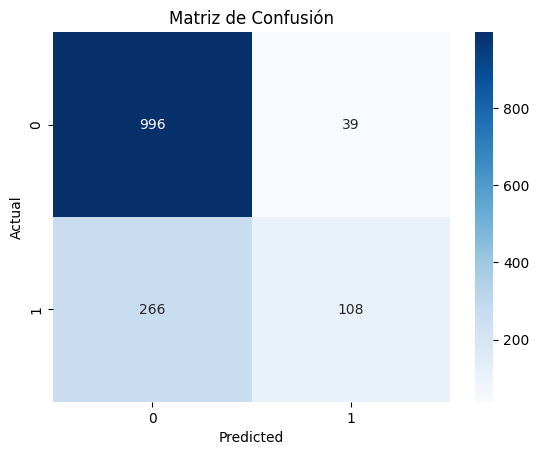

In [234]:
# -------------------------
# Matriz de Confusión
# -------------------------
cm = confusion_matrix(y_test, y_pred1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matriz de Confusión")
plt.show()

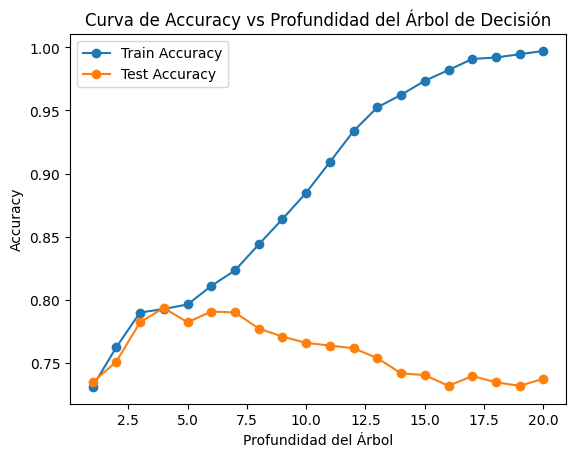

In [235]:
# Curva de Accuracy vs Profundidad del Árbol

train_acc = []
test_acc = []
depth_range = range(1, 21)

for depth in depth_range:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    train_acc.append(clf.score(X_train, y_train))
    test_acc.append(clf.score(X_test, y_test))

plt.plot(depth_range, train_acc, label='Train Accuracy', marker='o')
plt.plot(depth_range, test_acc, label='Test Accuracy', marker='o')
plt.xlabel("Profundidad del Árbol")
plt.ylabel("Accuracy")
plt.title("Curva de Accuracy vs Profundidad del Árbol de Decisión")
plt.legend()
plt.show()

REGRESION LOGISTICA


In [236]:
df.isnull().values.any()


np.False_

In [237]:
# scaling
scaler = StandardScaler()
X_train_lr = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)

X_test_lr = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [238]:
# Inicializar el modelo
logreg = LogisticRegression(class_weight='balanced', random_state=42)

# Entrenar
logreg.fit(X_train_lr, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [239]:
#subir el threshold para mejorar precision, si no se hace esto hay muchos falsos positivos al ser un dataset desbalanceado
y_proba = logreg.predict_proba(X_test_lr)[:, 1]
y_pred_lr = (y_proba >= 0.7).astype(int)  # threshold alto

In [240]:
#evaluar
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)  
print("Recall:", recall_lr)

Accuracy: 0.7970191625266146
Precision: 0.6189189189189189
Recall: 0.6122994652406417


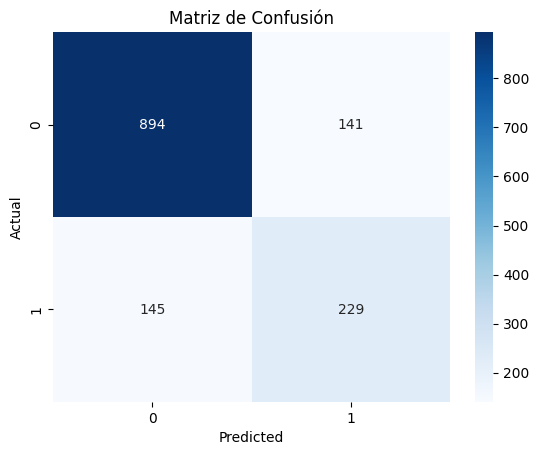

In [241]:
# matriz de confusion
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matriz de Confusión")
plt.show()

XGB + RandomSearchCV

In [242]:
#param grid para RandomSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.05],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'early_stopping_rounds':[50],
    'eval_metric':['logloss']
}

In [243]:
xgb = XGBClassifier()
cv = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=50,
    scoring='accuracy',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)
cv.fit(
    X_train, 
    y_train,
    eval_set=[(X_val, y_val)],
    verbose=False
)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


,estimator,"XGBClassifier...ree=None, ...)"
,param_distributions,"{'colsample_bytree': [0.6, 0.8, ...], 'early_stopping_rounds': [50], 'eval_metric': ['logloss'], 'learning_rate': [0.01, 0.1, ...], ...}"
,n_iter,50
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [244]:
best_model = cv.best_estimator_
val_accuracy = best_model.score(X_val, y_val)
print("Accuracy en validation:", val_accuracy)


Accuracy en validation: 0.8041163946061036


In [245]:
#evaluar
y_pred_xgb = best_model.predict(X_test)


precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)

print("Precision:", precision_xgb)
print("Recall:", recall_xgb)

Precision: 0.6513157894736842
Recall: 0.5294117647058824


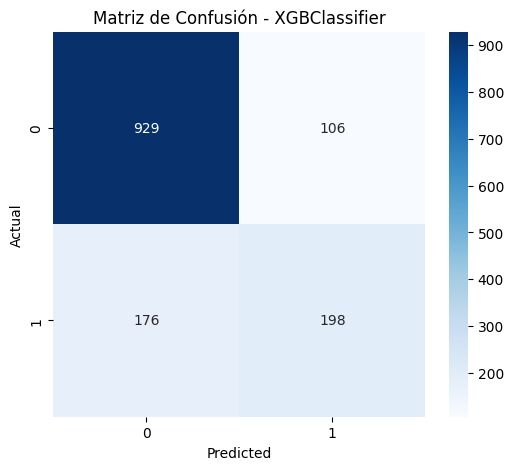

In [246]:
#matriz de confusion

y_pred = best_model.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Mostrar la matriz con heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matriz de Confusión - XGBClassifier")
plt.show()